# Exploratory Data Analysis and Bussiness Insights

Aim:
This notebook performs EDA on the datasets: Customers.csv, Products.csv, Transactions.csv by analyzing sales trends, customer behaviours and product performance etc to derive bussiness insights.

Steps:
1. Data loading and preprocessing
2. Data cleaning
3. Data merging for a unified view
4. EDA
5. Bussiness insights and visualisations

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_customers = pd.read_csv('Customers.csv')
df_products = pd.read_csv('Products.csv')
df_transactions = pd.read_csv('Transactions.csv')

In [5]:
ls_name = ["Customers", "Products", "Transactions"]
ls = [df_customers, df_products, df_transactions]
for l in ls:
  print(l.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ----------

In [6]:
for l in ls:
  print(l.head(),"\n")

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3   

Converting Date columns from string to DateTime format

In [7]:
df_customers['SignupDate'] = pd.to_datetime(df_customers['SignupDate'])
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])

Checking the Missing Values

In [8]:
for l in ls:
  print(l.isnull().sum(),"\n")

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



Looking for redundant records

In [9]:
print("Customers", df_customers.duplicated().sum())
print("Products", df_products.duplicated().sum())
print("Transactions", df_transactions.duplicated().sum())

Customers 0
Products 0
Transactions 0


Observation: There were no missing values, no duplicate values in all the three data sets.

In [10]:
df_merged = df_transactions.merge(df_customers, on='CustomerID', how='left').merge(df_products, on='ProductID', how='left')


In [11]:
df_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


#Let's find out some insights from this data

1. Top selling products
2. Top categories
3. Sales trends over time
4. Regional sales data
5. Top customers
6. Age of the customers

#1. Top Selling Products

In [13]:
top = df_merged.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)

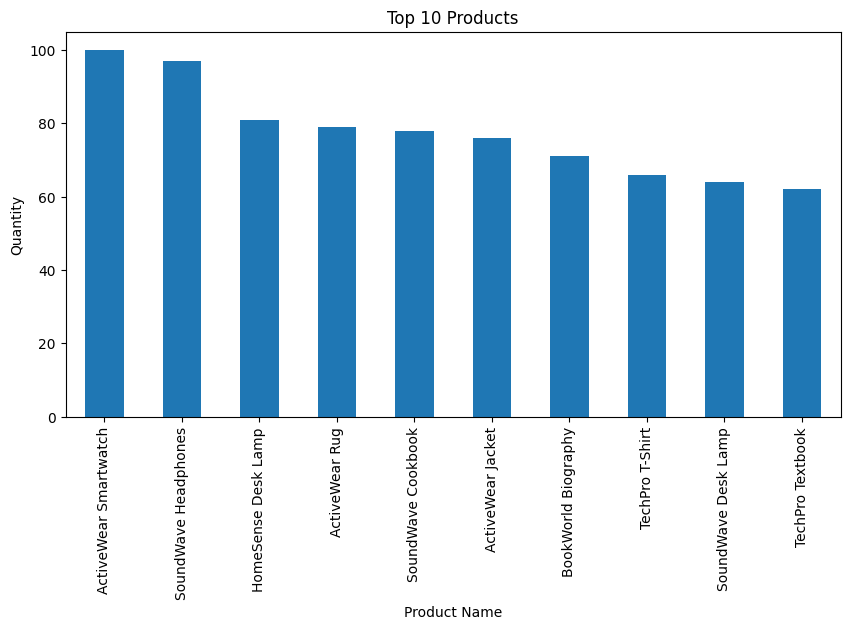

In [14]:
plt.figure(figsize=(10,5))
top.plot(kind="bar")
plt.title("Top 10 Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity")
plt.show()

#2. Top Categories

In [15]:
top_categories = df_merged.groupby("Category")["Quantity"].sum().sort_values(ascending=False).head(10)

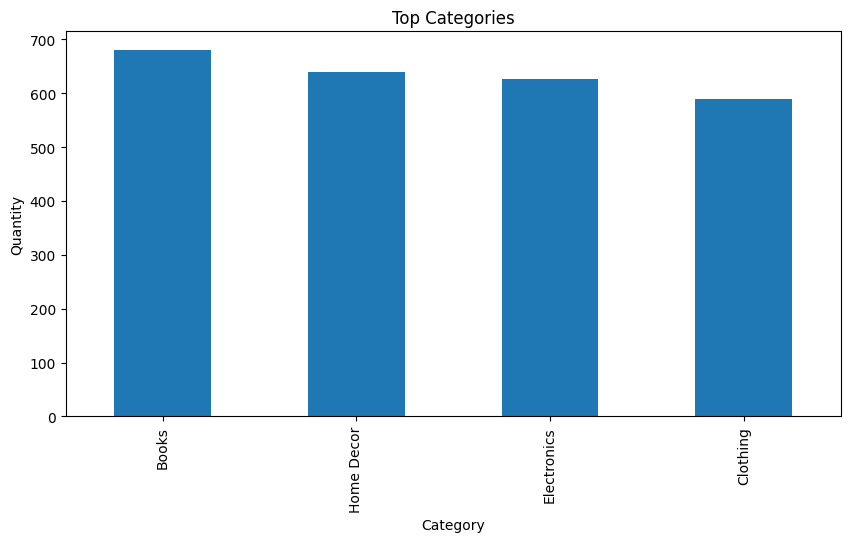

In [16]:
plt.figure(figsize=(10,5))
top_categories.plot(kind="bar")
plt.title("Top Categories")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.show()

#3. Sales Trend over time

In [17]:
df_merged["Month"] = df_merged["TransactionDate"].dt.to_period("M")
monthly_sales = df_merged.groupby("Month")["TotalValue"].sum()

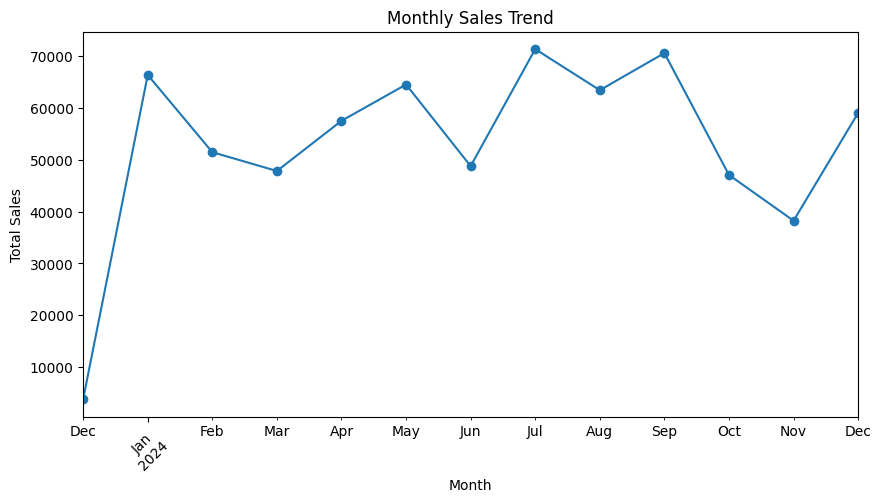

In [18]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend", ylabel="Total Sales", xlabel="Month")
plt.xticks(rotation=45)
plt.show()

#4. Regional Sales Data

In [19]:
regional_sales = df_merged.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)


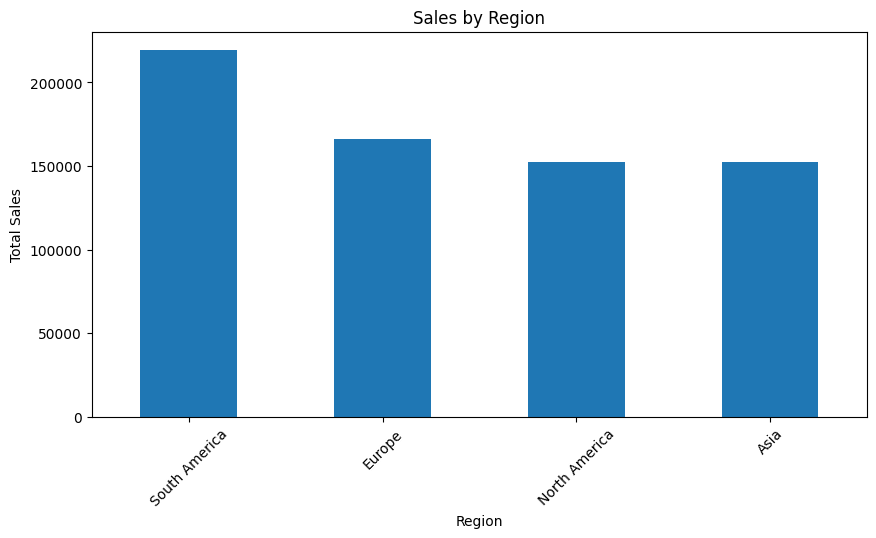

In [20]:
plt.figure(figsize=(10, 5))
regional_sales.plot(kind="bar", title="Sales by Region", ylabel="Total Sales", xlabel="Region")
plt.xticks(rotation=45)
plt.show()

#5. Top Customers

In [21]:
top_customers = df_merged.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)

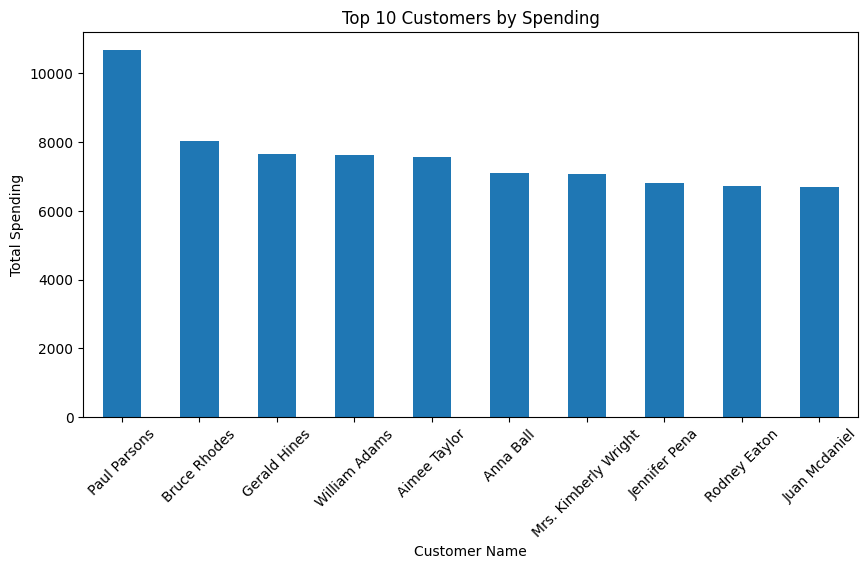

In [22]:
plt.figure(figsize=(10, 5))
top_customers.plot(kind="bar", title="Top 10 Customers by Spending", ylabel="Total Spending", xlabel="Customer Name")
plt.xticks(rotation=45)
plt.show()